# Boston Dataset
We can replicate the analysis from the lecture notes on a real dataset to get a more meaningful model

In [1]:
from sklearn.datasets import load_boston

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This dataset is imported as a dictionary with a range of information

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

---

## Convert to DataFrame

In [9]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

We might as well add the target to the dataframe, we'll need it soon.

In [10]:
df['MEDV'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


---

## EDA

Running `pairplot()` shows a few nonlinear relationships with **MEDV**

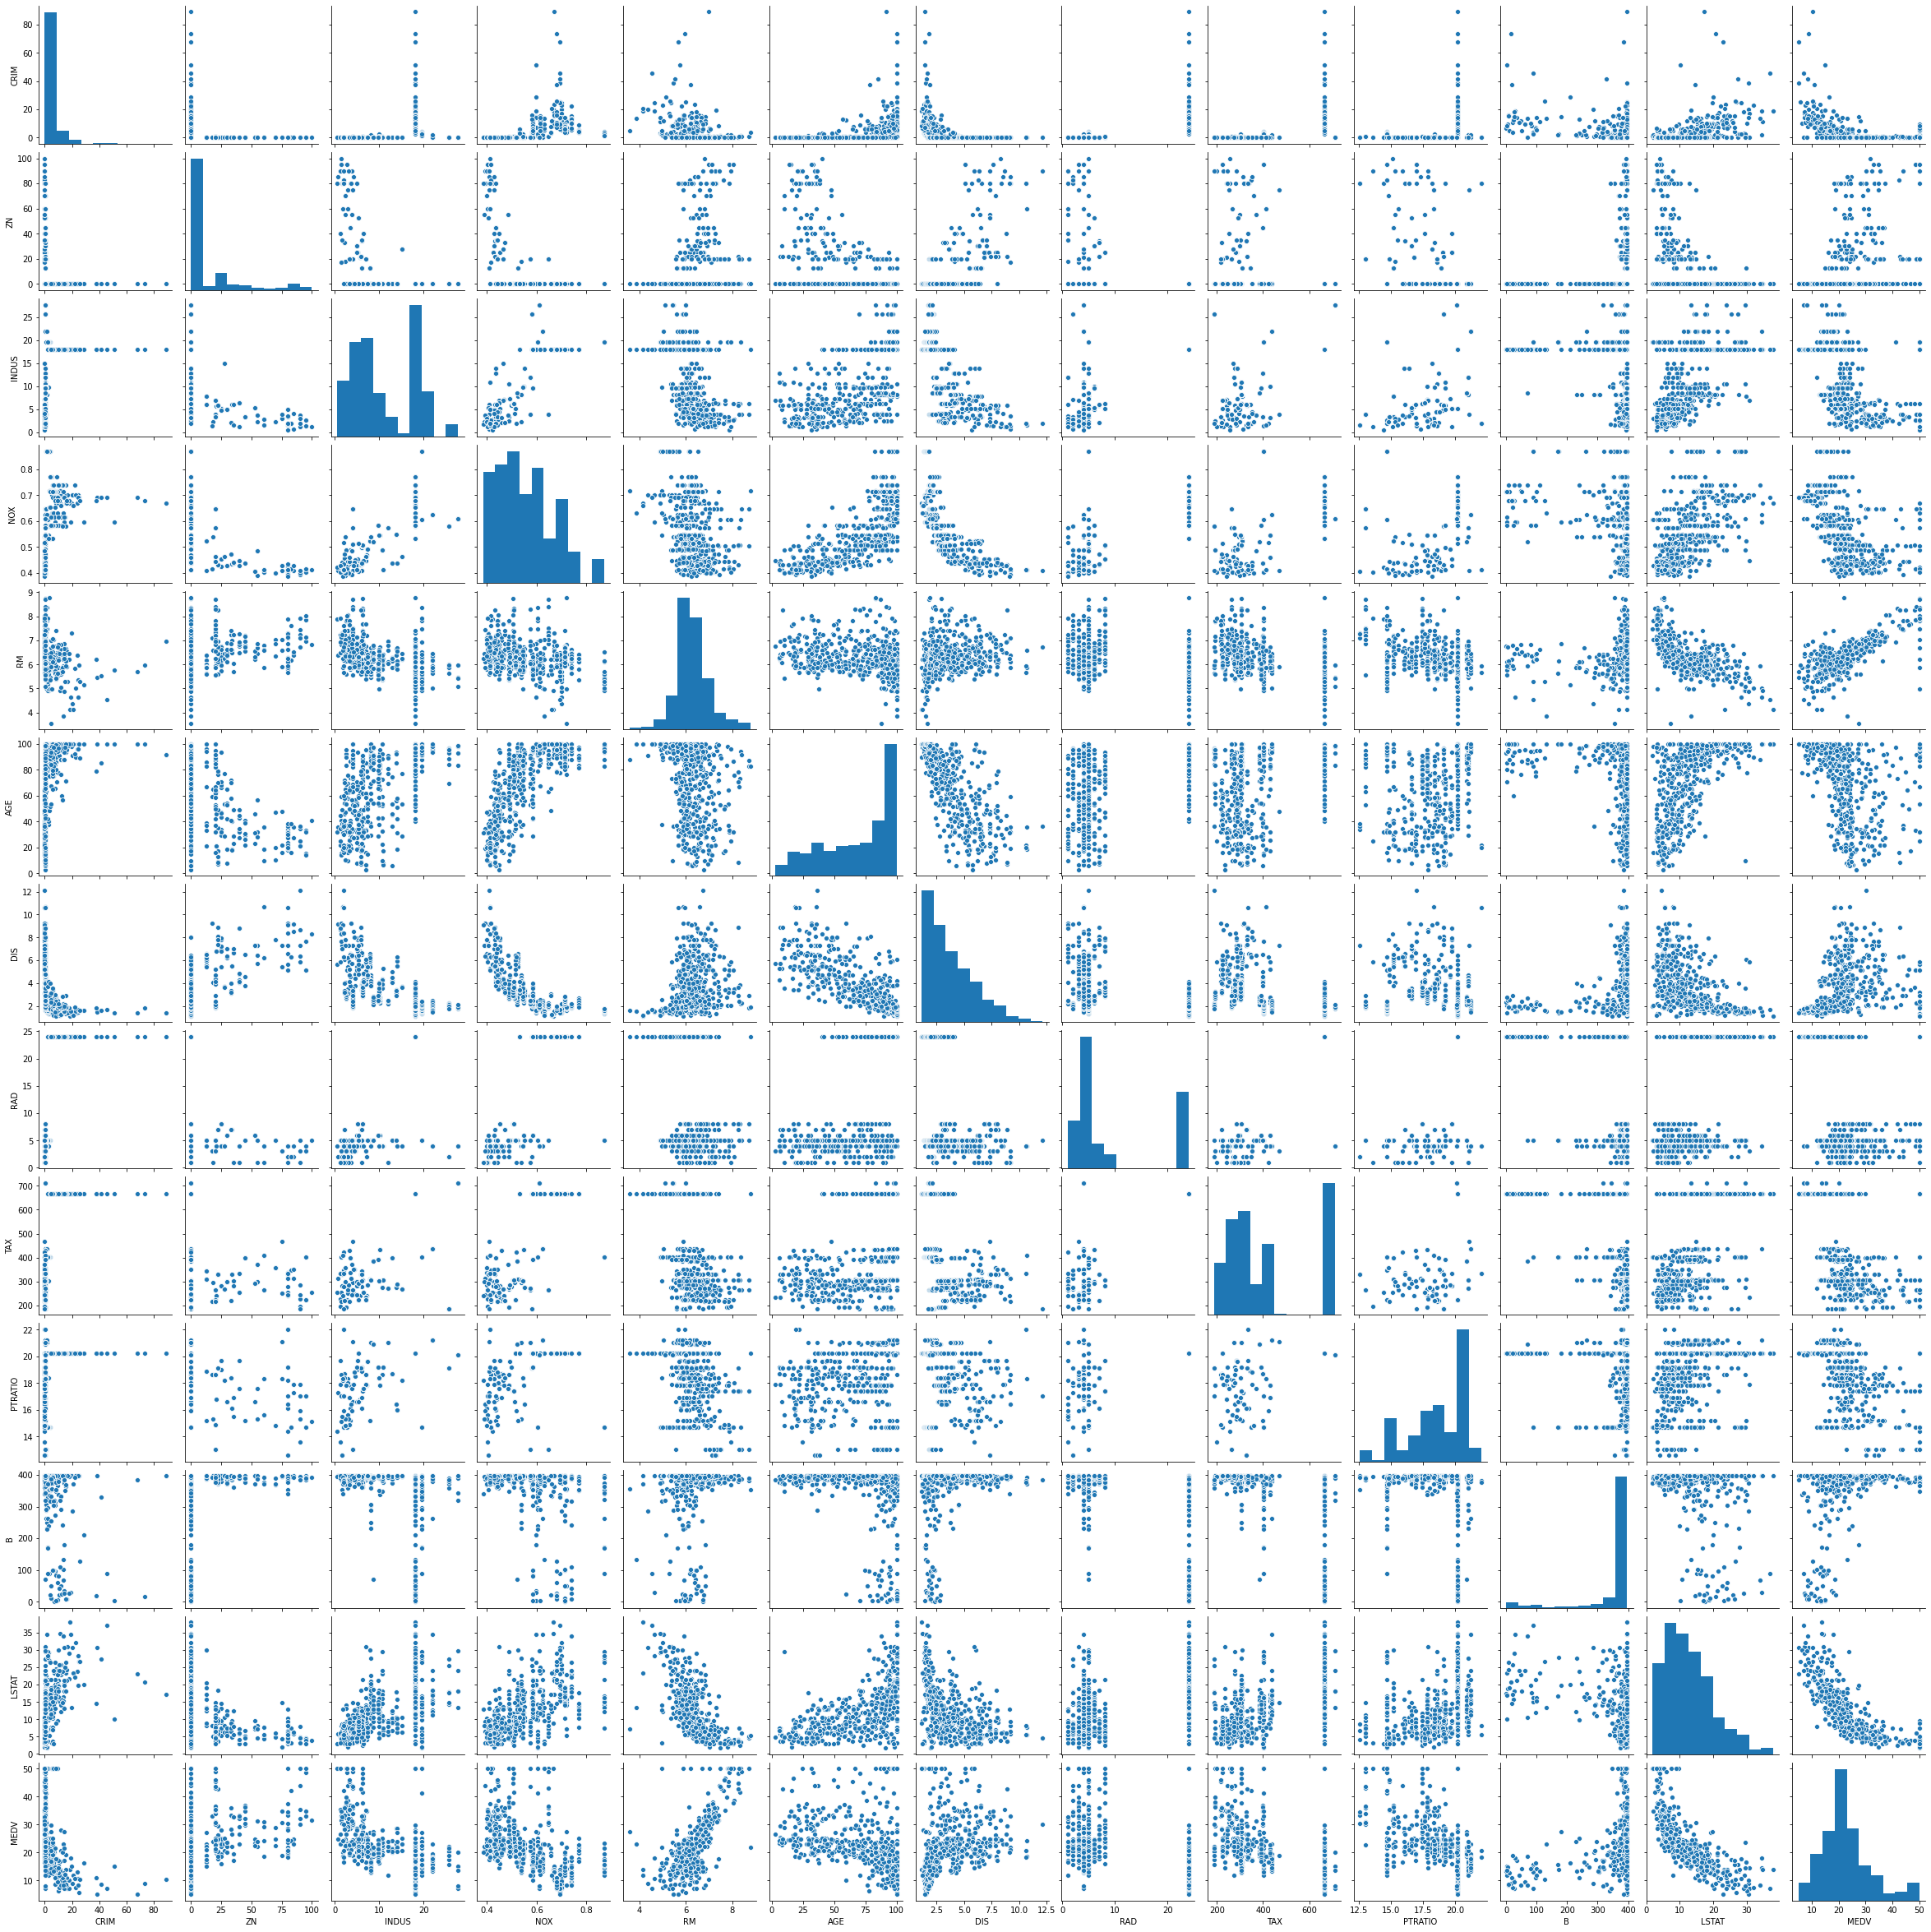

In [11]:
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']])

With a heatmap, we can see which attributes are directly proportional (*red*), inversely proportional (*blue*), or not correlated (*white*) with **MEDV**.

Note: **CHAS** is a dummy variable and does not seem to be correlated with anything. This is why it was left out of the pairplot above.

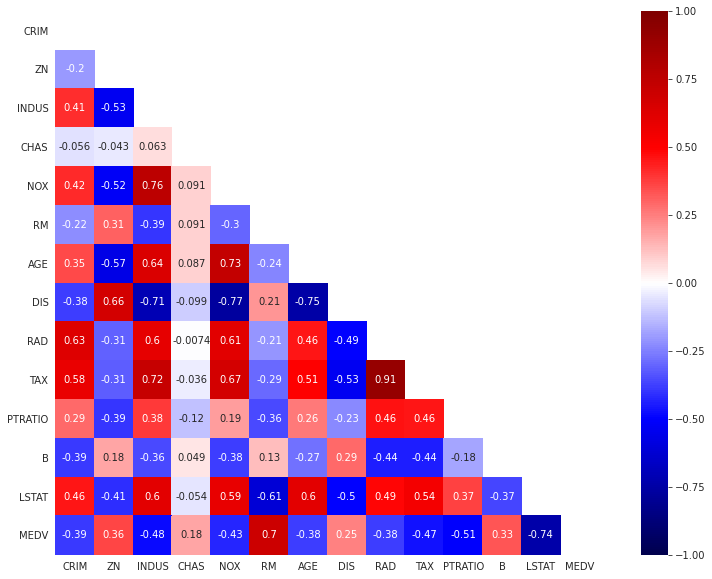

In [12]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, square=True, cmap='seismic')

The target **MEDV** appears to have a few peaks. We will see how this affects the model.

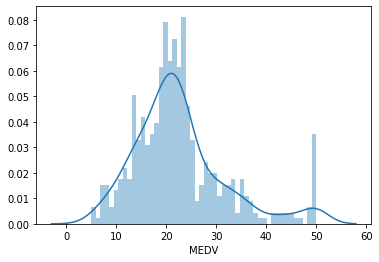

In [13]:
sns.distplot(df['MEDV'], bins=50)

---

## Declare the Predictor and Response variables

In [14]:
X = df[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [15]:
y = df['MEDV']

---

## Split the data into TEST and TRAIN data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

---

## Create and train the model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

---

## Evaluate the resulting model

In [20]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff (𝛽)'])
cdf

,Coeff (𝛽)
CRIM,-0.094402
ZN,0.048209
INDUS,0.049277
NOX,-18.191092
RM,3.314899
AGE,0.017870
DIS,-1.403299
RAD,0.291572
TAX,-0.011901
PTRATIO,-1.022335


---

## Predictions

In [21]:
predictions = lm.predict(X_test)
predictions

array([40.40726494, 27.66439109, 16.74117302, 17.20068362, 31.04476395,
       32.40174839, 39.27050119,  7.95944329, 34.44138083,  7.11430281,
       30.39527622, 13.67831072, 15.99054412, 16.96100938, 25.46066148,
       20.80015073,  7.13018485, 33.14945336, 28.5713633 , 24.80638221,
       12.68313819, 20.49556839, 22.72472471, 24.42026205, 33.95302973,
       18.97720101, 29.00301921, 19.02863045, 23.99209591, 34.71373063,
       19.87783381, 18.44938885, 37.40456103, 41.52147243, 30.88607996,
       22.11047517, 16.05342252, 18.37575502,  4.10055157, 31.49735654,
       24.51539015, 16.63305228, 34.2884462 , 14.19290653, 17.57574654,
       25.78093642, 30.63777438, 16.39563032, 27.17627627, 23.2435454 ,
       32.71873166, 34.19075461, 23.59011567, 17.46123726, 30.64896143,
        0.06984034, 20.33864859, 16.85202364, 19.61352161, 17.70930398,
       30.26518367,  3.18539122, 16.1730507 , 19.82468508, 10.31940536,
       24.41936054, 24.2582264 , 19.79728057, 17.97675933, 19.67

In [22]:
y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
213    28.1
269    20.7
278    29.1
17     17.5
391    23.2
Name: MEDV, Length: 152, dtype: float64

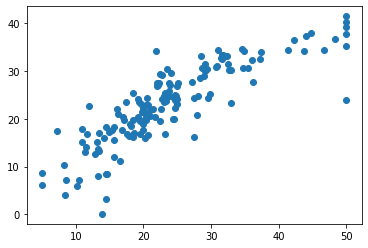

In [23]:
plt.scatter(y_test,predictions)

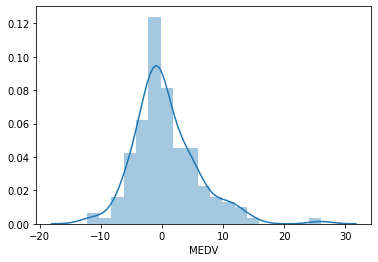

In [24]:
sns.distplot((y_test-predictions))

---

## Evaluating accuracy of our model

In [25]:
from sklearn import metrics

In [26]:
metrics.mean_absolute_error(y_test,predictions)

3.7464839369597036

In [27]:
metrics.mean_squared_error(y_test,predictions)

27.874535436860384

In [28]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

5.279634024897974